In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import torch

# Task 2

In [2]:
num_samples = 100
np.random.seed(42)

# Generate data with large feature scale
x = np.random.uniform(0, 1000, num_samples)
f_x = 3 * x + 2
eps = np.random.randn(num_samples)
y = f_x + eps

### 2.1 Full Batch GD without feature scaling

**[1 mark]** Using the above dataset, implement **full-batch gradient descent** for **linear regression** on the dataset above **without any feature scaling**.  
Define the convergence criterion as reaching an **epsilon-neighborhood** of the empirical least squares minimizer \( θ* \), with \( ε = 0.001 \).

$$
|θ_t - θ*| < ε
$$

Determine the **number of iterations** required to satisfy this convergence criterion.  
Finally, **plot MSE loss versus iterations**.


In [3]:
def full_batch_gd(x, y, alpha=0.01, epsilon=0.001, max_iters=10000):
    w = torch.tensor(1.0, requires_grad=True)
    b = torch.tensor(1.0, requires_grad=True)
    theta_prev = torch.tensor([0.0, 0.0])
    losses = []
    converged_iter = max_iters

    
    X_design = torch.cat([x.view(-1, 1), torch.ones_like(x.view(-1, 1))], dim=1)
    theta_true = torch.linalg.inv(X_design.T @ X_design) @ (X_design.T @ y.view(-1, 1))
    print(f"theta_true:\n{theta_true}\n")

    for i in range(max_iters):
        y_pred = w * x + b
        loss = torch.mean((y_pred - y) ** 2)
        losses.append(loss.item())
        loss.backward()

        # Update weights and that do not need to be in the computational graph
        with torch.no_grad():
            w -= alpha * w.grad
            b -= alpha * b.grad

        # gradients are set to 0 because when again loss.backward is calculated the gradient of w and b are added to w.grad and
        # b.grad repectively so to ensure the value of w.grad and b.grad is correct as soon as w.grad is used it is set to 0
        w.grad.zero_()
        b.grad.zero_()



        # Convergence check
        theta = torch.tensor([[w.item()], [b.item()]])
        if torch.norm(theta - theta_true) < epsilon:
            converged_iter = i + 1
            break

    return w.item(), b.item(), losses, converged_iter


torch_x = torch.from_numpy(x)
torch_y = torch.from_numpy(y)

w1, b1, losses, iters_unscaled = full_batch_gd(torch_x, torch_y)
print(f"Weights (w1): {w1}")
print(f"Bias (b1): {b1}")
print(f"Iterations (unscaled data): {iters_unscaled}")


theta_true:
tensor([[2.9995],
        [2.2151]], dtype=torch.float64)

Weights (w1): nan
Bias (b1): nan
Iterations (unscaled data): 10000


**Observation**: We saw in the above case when we didn't use feature scaling the update rule exploded i.e step size became toobig because of very large feature values / x values.
As you can see the losses kept on increasing instead of decreasing bacause x is very leagre set of values and max_iterations is also exhausted with w and b being nan

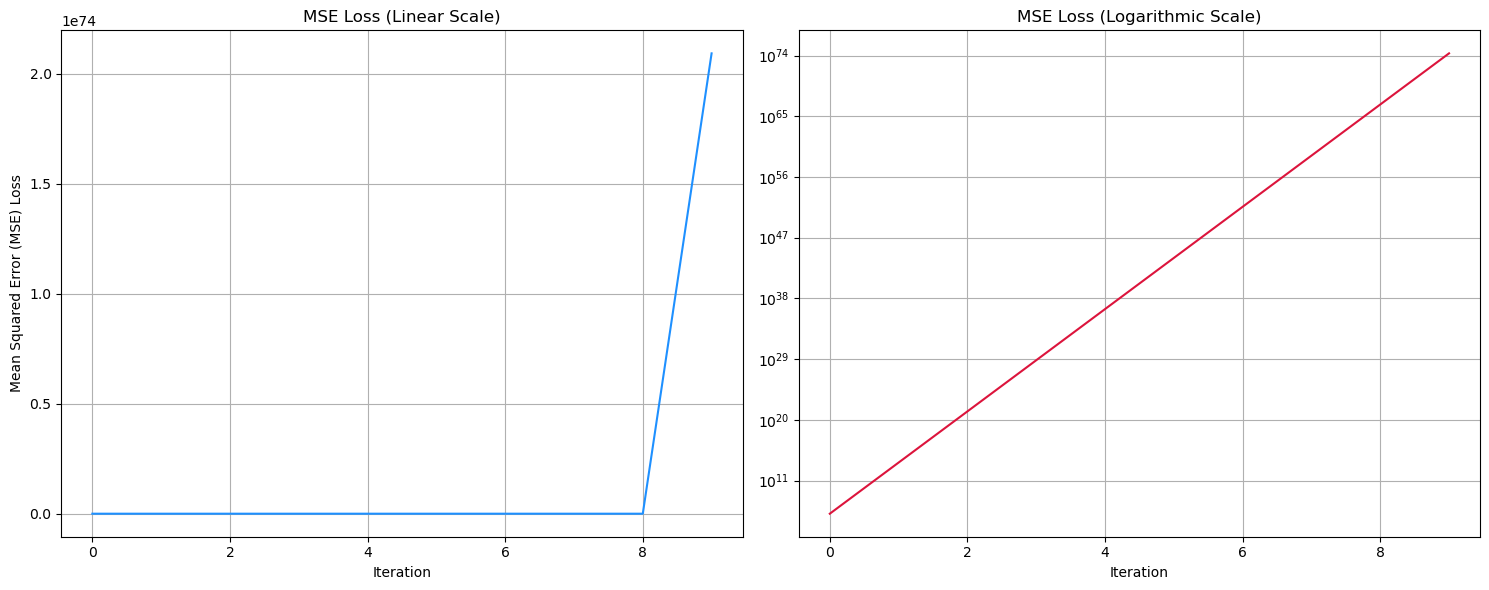

In [4]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax1.plot(torch.arange(10000), losses, color='dodgerblue')
ax1.set_title("MSE Loss (Linear Scale)")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Mean Squared Error (MSE) Loss")
ax1.grid(True)

# With log scale, the axis is logarithmic: equal spacing corresponds to equal ratios (multiplicative steps) instead of equal differences.
# Example: y = 1, 10, 100, 1000 → each step is ×10.

ax2.plot(torch.arange(10000), losses, color='crimson')
ax2.set_title("MSE Loss (Logarithmic Scale)")
ax2.set_xlabel("Iteration")
ax2.grid(True)
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

### 2.2 Full Batch GD with feature scaling

**[1 mark]** Apply **z-score normalization** to the feature:

$$
x_{\text{scaled}} = \frac{x - \mu_x}{\sigma_x}
$$

Run **full-batch gradient descent** on the scaled dataset with the same convergence criterion \( ε = 0.001 \). \
Define convergence as reaching the epsilon-neighborhood of the empirical least squares minimizer \( θ* \):

$$
\lVert \theta_t - \theta^* \rVert < \varepsilon
$$

Determine the **number of iterations** required for convergence.  
Finally, **plot MSE loss versus iterations**.


theta_true:
tensor([[3.0984],
        [1.9790]], dtype=torch.float64)

Weights (w1): 3.097499132156372
Bias (b1): 1.9786529541015625
Iterations (scaled data): 387


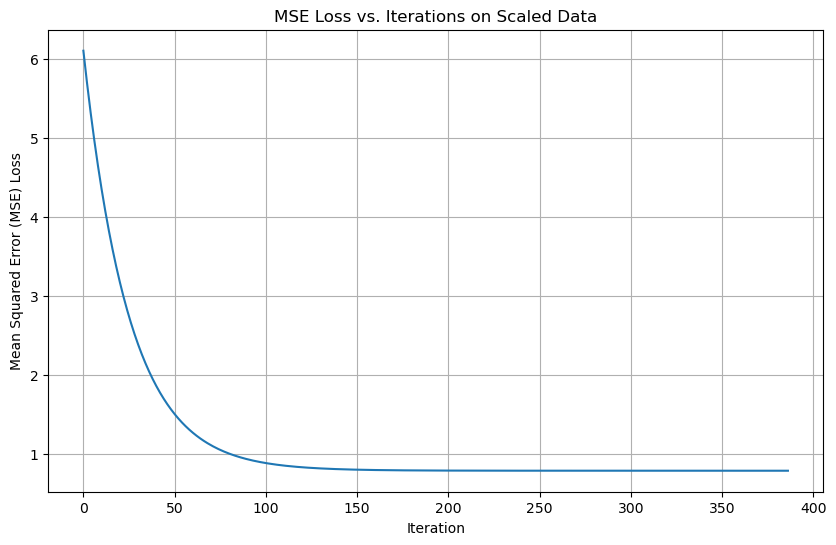

In [6]:
x_scaled = (torch_x - torch.mean(torch_x))/torch.std(torch_x)
y = 3 * x_scaled + 2 + torch.randn(num_samples)

w1, b1, losses_scaled, iters_scaled = full_batch_gd(x_scaled, y)
print(f"Weights (w1): {w1}")
print(f"Bias (b1): {b1}")
print(f"Iterations (scaled data): {iters_scaled}")

plt.figure(figsize=(10, 6))
plt.plot(torch.arange(len(losses_scaled)), losses_scaled)
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error (MSE) Loss")
plt.title("MSE Loss vs. Iterations on Scaled Data")
plt.grid(True)
plt.show()